#                                                          Machine Learning with Python

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# About dataset


Field  =	Description
Loan_status  =	Whether a loan is paid off on in collection
Principal	= Basic principal loan amount at the
Terms = 	Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule
Effective_date	 =  When the loan got originated and took effects
Due_date  = 	Since it’s one-time payoff schedule, each loan has one single due date
Age	Age of applicant
Education	=  Education of applicant
Gender	=   The gender of applicant

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
    

--2020-07-21 19:55:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-07-21 19:55:50 (14.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



# Load Data From CSV File

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000     30       9/9/2016   
4           6             6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male

In [4]:
df.shape


(346, 10)

# Convert to date time object

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  
3 2016-10-08   28               college  female  
4 2016-10-08   29               college    male

# Data visualization and pre-processing

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.6.24-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

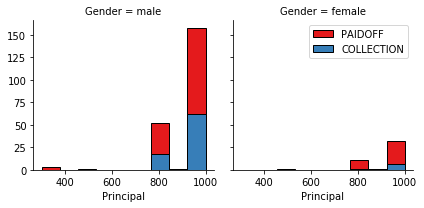

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

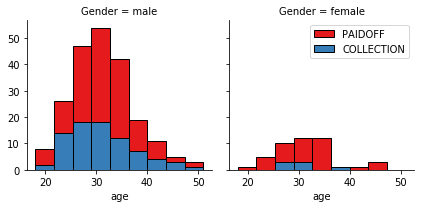

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction

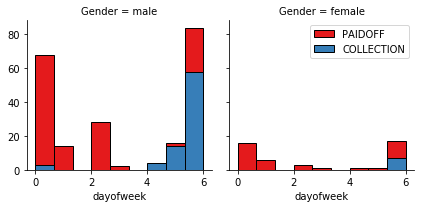

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [16]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below    male          3        0  
1 2016-10-07   33              Bechalor  female          3        0  
2 2016-09-22   27               college    male          3        0  
3 2016-10-08   28               college  female          4        1  
4 2016-10-08   29               college    male          4        1

# Convert Categorical features to numerical values

In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [20]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()


Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below       0          3        0  
1 2016-10-07   33              Bechalor       1          3        0  
2 2016-09-22   27               college       0          3        0  
3 2016-10-08   28               college       1          4        1  
4 2016-10-08   29               college       0          4        1

# One Hot Encoding

In [23]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [24]:
df[['Principal','terms','age','Gender','education']].head()

Principal  terms  age  Gender             education
0       1000     30   45       0  High School or Below
1       1000     30   33       1              Bechalor
2       1000     15   27       0               college
3       1000     30   28       1               college
4       1000     30   29       0               college

In [26]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

# Feature selection

In [29]:
X = Feature
X[0:5]


Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

In [31]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Normalize Data

In [34]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification

# K Nearest Neighbor(KNN)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print("Train:",X_train.shape, Y_train.shape)
print("Test:", Y_test.shape, Y_test.shape)

Train: (276, 8) (276,)
Test: (70,) (70,)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [42]:
_neighboars = [3,8]
for _n in range(_neighboars[0],_neighboars[1]):
    _knn = KNeighborsClassifier(n_neighbors=_n).fit(X_train, Y_train)
    _yhat = _knn.predict(X_test)
    print(f"-->Neighboar: {_n}")
    print("Train Set Accuracy:", metrics.accuracy_score(Y_train, _knn.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(Y_test, _yhat))

-->Neighboar: 3
Train Set Accuracy: 0.8333333333333334
Test set Accuracy:  0.7142857142857143
-->Neighboar: 4
Train Set Accuracy: 0.8152173913043478
Test set Accuracy:  0.6857142857142857
-->Neighboar: 5
Train Set Accuracy: 0.8152173913043478
Test set Accuracy:  0.7571428571428571
-->Neighboar: 6
Train Set Accuracy: 0.8007246376811594
Test set Accuracy:  0.7142857142857143
-->Neighboar: 7
Train Set Accuracy: 0.8079710144927537
Test set Accuracy:  0.7857142857142857


In [43]:
_ks = 10
_mean_acc = np.zeros((_ks-1))
_std_acc = np.zeros((_ks-1))
for _k in range(1,_ks-1):
    _neigh = KNeighborsClassifier(n_neighbors=_k).fit(X_train, Y_train)
    _yhat = _neigh.predict(X_test)
    _mean_acc[_k-1] = metrics.accuracy_score(Y_test, _yhat)
    _std_acc[_k-1]=np.std(_yhat==Y_test)/np.sqrt(_yhat.shape[0])
print(_mean_acc)

[0.67142857 0.65714286 0.71428571 0.68571429 0.75714286 0.71428571
 0.78571429 0.75714286 0.        ]


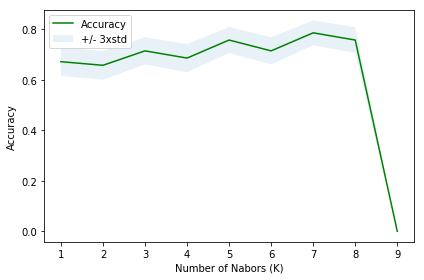

In [45]:
plt.plot(range(1,_ks), _mean_acc,'g')
plt.fill_between(range(1,_ks), _mean_acc-_std_acc, _mean_acc+1*_std_acc, alpha=0.10)
plt.legend(("Accuracy","+/- 3xstd"))
plt.ylabel("Accuracy")
plt.xlabel("Number of Nabors (K)")
plt.tight_layout()
plt.show()

In [46]:
print( "The best accuracy for test was with", _mean_acc.max(), "with k=", _mean_acc.argmax()+1)

The best accuracy for test was with 0.7857142857142857 with k= 7


In [47]:
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, _knn.predict(X_test)))

Test set Accuracy:  0.7857142857142857


In [48]:
_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
_td = DecisionTreeClassifier(criterion='entropy', max_depth=7).fit(X_train,Y_train)
_pred = _Tree.predict(X_test)

NameError: name '_Tree' is not defined

In [53]:
print(f"DecisionTrees's Accuracy: {metrics.accuracy_score(Y_test, _pred)}")

NameError: name '_pred' is not defined

In [55]:
_td_max = 10
_td_scores = np.zeros((_td_max-1))

for _d in range(1, _td_max):
    _td = DecisionTreeClassifier(criterion='entropy', max_depth=_d).fit(X_train,Y_train)
    _pred = _td.predict(X_test)
    _td_scores[_d-1] = metrics.accuracy_score(Y_test, _pred )
    print(f"Acc: {metrics.accuracy_score(Y_test, _pred)} with d: {_d}")

Acc: 0.7857142857142857 with d: 1
Acc: 0.7857142857142857 with d: 2
Acc: 0.6142857142857143 with d: 3
Acc: 0.6142857142857143 with d: 4
Acc: 0.6428571428571429 with d: 5
Acc: 0.7714285714285715 with d: 6
Acc: 0.7571428571428571 with d: 7
Acc: 0.7571428571428571 with d: 8
Acc: 0.6571428571428571 with d: 9


In [56]:
print(f"The best accurary for test was with {_td_scores.max()}, with d = {_td_scores.argmax()+1}")

The best accurary for test was with 0.7857142857142857, with d = 1


In [57]:
_td = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train,Y_train)

# Support Vector Machine

In [59]:
from sklearn import svm

In [60]:
_svm = svm.SVC(kernel='linear', gamma="auto").fit(X_train, Y_train)
print(f"LINEAR - SVM Accuracy: {metrics.accuracy_score(Y_test,_svm.predict(X_test))}")

LINEAR - SVM Accuracy: 0.7857142857142857


In [61]:
_svm = svm.SVC(kernel='poly', gamma="auto").fit(X_train, Y_train)
print(f"POLY - SVM Accuracy: {metrics.accuracy_score(Y_test,_svm.predict(X_test))}")

POLY - SVM Accuracy: 0.7714285714285715


In [62]:
_svm = svm.SVC(kernel='rbf', gamma="auto").fit(X_train, Y_train)
print(f"RBF - SVM Accuracy: {metrics.accuracy_score(Y_test,_svm.predict(X_test))}")

RBF - SVM Accuracy: 0.7428571428571429


In [63]:
_svm = svm.SVC(kernel='sigmoid', gamma="auto").fit(X_train, Y_train)
print(f"SIGMOID - SVM Accuracy: {metrics.accuracy_score(Y_test,_svm.predict(X_test))}")

SIGMOID - SVM Accuracy: 0.7428571428571429


In [64]:
_svm = svm.SVC(kernel='linear', gamma="auto").fit(X_train, Y_train)
print(f"Best SVM is with kernel LINEAR Accuracy: {metrics.accuracy_score(Y_test,_svm.predict(X_test))}")

Best SVM is with kernel LINEAR Accuracy: 0.7857142857142857


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
_lr = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train, Y_train)
print(f"NEWTON-CG <> Logistic Regression's Accuracy: {metrics.accuracy_score(Y_test, _lr.predict(X_test))}")

NEWTON-CG <> Logistic Regression's Accuracy: 0.7857142857142857


In [68]:
_lr = LogisticRegression(C=0.01, solver="lbfgs").fit(X_train, Y_train)
print(f"LBFGS <> Logistic Regression's Accuracy: {metrics.accuracy_score(Y_test, _lr.predict(X_test))}")

LBFGS <> Logistic Regression's Accuracy: 0.7857142857142857


In [69]:
_lr = LogisticRegression(C=0.01, solver="liblinear").fit(X_train, Y_train)
print(f"LIBLINEAR <> Logistic Regression's Accuracy: {metrics.accuracy_score(Y_test, _lr.predict(X_test))}")

LIBLINEAR <> Logistic Regression's Accuracy: 0.6857142857142857


In [70]:
_lr = LogisticRegression(C=0.01, solver="sag").fit(X_train, Y_train)
print(f"SAG <> Logistic Regression's Accuracy: {metrics.accuracy_score(Y_test, _lr.predict(X_test))}")

SAG <> Logistic Regression's Accuracy: 0.7857142857142857


In [71]:
_lr = LogisticRegression(C=0.01, solver="saga").fit(X_train, Y_train)
print(f"SAGA <> Logistic Regression's Accuracy: {metrics.accuracy_score(Y_test, _lr.predict(X_test))}")

SAGA <> Logistic Regression's Accuracy: 0.7857142857142857


In [72]:
_lr = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train, Y_train)
print(f"Best NEWTON-CG <> Logistic Regression's Accuracy: {metrics.accuracy_score(Y_test, _lr.predict(X_test))}")

Best NEWTON-CG <> Logistic Regression's Accuracy: 0.7857142857142857


# Model Evaluation using Test set

In [74]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [76]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-07-21 20:45:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-07-21 20:45:11 (251 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [78]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30       9/8/2016   
1           5             5     PAIDOFF        300      7       9/9/2016   
2          21            21     PAIDOFF       1000     30      9/10/2016   
3          24            24     PAIDOFF       1000     30      9/10/2016   
4          35            35     PAIDOFF        800     15      9/11/2016   

    due_date  age             education  Gender  
0  10/7/2016   50              Bechalor  female  
1  9/15/2016   35       Master or Above    male  
2  10/9/2016   43  High School or Below  female  
3  10/9/2016   26               college    male  
4  9/25/2016   29              Bechalor    male

In [79]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
_test_feature = test_df[['Principal','terms','age','Gender','weekend']]
_test_feature = pd.concat([_test_feature,pd.get_dummies(test_df['education'])], axis=1)
_test_feature.drop(['Master or Above'], axis = 1,inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(
    preprocessing.StandardScaler().fit(_test_feature).transform(_test_feature),
    test_df['loan_status'].values,
    test_size=0.2, random_state=4
)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [80]:
_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
_yhat_knn = _knn.predict(X_test)

_dt = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train, Y_train)
_yhat_dt = _dt.predict(X_test)

_svm = svm.SVC(kernel='linear').fit(X_train, Y_train)
_yhat_svm = _svm.predict(X_test)

_lr = LogisticRegression(C=0.01, solver="newton-cg").fit(X_train,Y_train)
_yhat_lr = _lr.predict(X_test)
_yhat_lr_prob = _lr.predict_proba(X_test)

In [81]:
_jc_all = [
    round(jaccard_similarity_score(Y_test, _yhat_knn),2),
    round(jaccard_similarity_score(Y_test, _yhat_dt),2),
    round(jaccard_similarity_score(Y_test, _yhat_svm),2),
    round(jaccard_similarity_score(Y_test, _yhat_lr),2)
]
_fs_all = [
    round(f1_score(Y_test, _yhat_knn, average="weighted"),2),
    round(f1_score(Y_test, _yhat_dt, average="weighted"),2),
    round(f1_score(Y_test, _yhat_svm, average="weighted"),2),
    round(f1_score(Y_test, _yhat_lr, average="weighted"),2)
]
_ll_all = ('NA', 'NA','NA',
           round(log_loss(Y_test, _yhat_lr_prob),2))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
import pandas as pd

# fomulate the report format
df = pd.DataFrame(_jc_all, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=_fs_all)
df.insert(loc=2, column='LogLoss', value=_ll_all)
df.columns.name = 'Algorithm'
df

Algorithm            Jaccard  F1-score LogLoss
KNN                     0.82      0.82      NA
Decision Tree           0.55      0.63      NA
SVM                     0.55      0.64      NA
Logistic Regression     0.91      0.87    0.41

# THANKYOU

